In [25]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import scipy
import cv2 as cv

In [26]:
our_own_dataset = []

# load the png image data
for image_file_name in glob.glob('nepali_characters/*/*/*.jpg'):
    # use the filename to set the correct label
    label = int(image_file_name[-14:-11])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = cv.imread(image_file_name, 0)  #Read an image from a file as an array
    (thresh, image_array) = cv.threshold(img_array, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    # reshape from 28x28 to list of 784 values, invert values
 #   img_data  = (255.0 - img_array.reshape(784))/255.0
    
    # then scale data to range from 0.01 to 1.0
#     img_data = (img_data / 255.0 * 0.99) + 0.01
#     print(np.min(img_data))
#     print(np.max(img_data))
    
    # append label and image data  to test data set
    record = np.append(label,image_array)
    our_own_dataset.append(record)

loading ...  nepali_characters/02_vowels/013/004_09.jpg
loading ...  nepali_characters/02_vowels/013/016_04.jpg
loading ...  nepali_characters/02_vowels/013/023_01.jpg
loading ...  nepali_characters/02_vowels/013/045_02.jpg
loading ...  nepali_characters/02_vowels/013/044_02.jpg
loading ...  nepali_characters/02_vowels/013/019_02.jpg
loading ...  nepali_characters/02_vowels/013/004_10.jpg
loading ...  nepali_characters/02_vowels/013/030_02.jpg
loading ...  nepali_characters/02_vowels/013/013_03.jpg
loading ...  nepali_characters/02_vowels/013/029_01.jpg
loading ...  nepali_characters/02_vowels/013/001_22.jpg
loading ...  nepali_characters/02_vowels/013/001_03.jpg
loading ...  nepali_characters/02_vowels/013/017_02.jpg
loading ...  nepali_characters/02_vowels/013/018_02.jpg
loading ...  nepali_characters/02_vowels/013/008_03.jpg
loading ...  nepali_characters/02_vowels/013/013_06.jpg
loading ...  nepali_characters/02_vowels/013/019_06.jpg
loading ...  nepali_characters/02_vowels/013/019

In [27]:
data = np.array(our_own_dataset)
np.random.shuffle(data)
xx = pd.DataFrame(data)

In [28]:
xx.tail()

,0,1,2,3,4,5,6,7,8,9,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
12907,17,255,255,255,255,255,255,255,255,255,...,255,255,0,0,0,255,255,255,255,255
12908,8,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12909,39,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12910,18,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12911,40,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [29]:
x = np.array(xx)
X = x[:,1:]
y = x[:,0]

In [30]:
x.shape

(12912, 1297)

In [31]:
# X = data_pd.iloc[:,1:]
# y = data_pd.iloc[:,0:1].values
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [32]:
# X_train = X_train.reshape(X_train.shape[0], 1, 36, 36).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 1, 36, 36).astype('float32')
img_rows = img_cols = 36
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

In [33]:
# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (10329, 36, 36, 1)
y_train shape (10329,)
X_test shape (2583, 36, 36, 1)
y_test shape (2583,)
Train matrix shape (10329, 36, 36, 1)
Test matrix shape (2583, 36, 36, 1)


In [34]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 58
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (10329,)
Shape after one-hot encoding:  (10329, 58)


In [42]:
# model = Sequential()
# model.add(Dense(256, input_shape=(1296,)))
# model.add(Activation('relu'))                            
# model.add(Dropout(0.2))

# model.add(Dense(192))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(58))
# model.add(Activation('softmax'))

# define the larger model
def larger_model():
# create model
    model = Sequential()
    model.add(Conv2D(15, (5, 5), input_shape=(36, 36, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(58, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [43]:
# build the model
model = larger_model()

In [44]:
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 10329 samples, validate on 2583 samples
Epoch 1/10
 - 10s - loss: 3.0152 - acc: 0.2751 - val_loss: 1.6649 - val_acc: 0.5544
Epoch 2/10
 - 8s - loss: 1.2223 - acc: 0.6573 - val_loss: 0.9199 - val_acc: 0.7449
Epoch 3/10
 - 8s - loss: 0.7680 - acc: 0.7776 - val_loss: 0.7186 - val_acc: 0.7851
Epoch 4/10
 - 8s - loss: 0.5763 - acc: 0.8309 - val_loss: 0.6033 - val_acc: 0.8161
Epoch 5/10
 - 8s - loss: 0.4666 - acc: 0.8588 - val_loss: 0.5507 - val_acc: 0.8366
Epoch 6/10
 - 8s - loss: 0.3702 - acc: 0.8897 - val_loss: 0.4719 - val_acc: 0.8618
Epoch 7/10
 - 8s - loss: 0.3157 - acc: 0.9009 - val_loss: 0.4458 - val_acc: 0.8691
Epoch 8/10
 - 8s - loss: 0.2610 - acc: 0.9191 - val_loss: 0.4424 - val_acc: 0.8719
Epoch 9/10
 - 8s - loss: 0.2237 - acc: 0.9283 - val_loss: 0.4638 - val_acc: 0.8707
Epoch 10/10
 - 8s - loss: 0.2024 - acc: 0.9338 - val_loss: 0.4503 - val_acc: 0.8753
Saved trained model at /home/uttam/PycharmProjects/ML/cnn_model.h5 


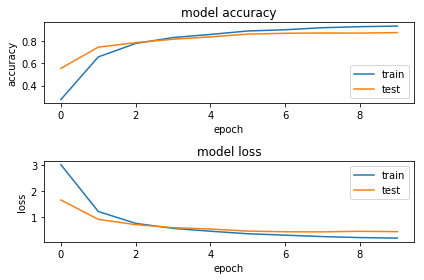

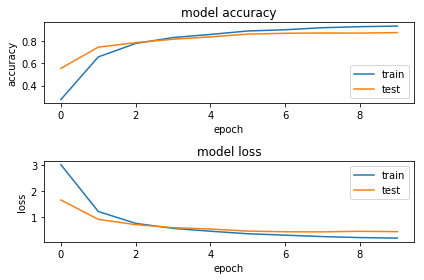

In [45]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/home/uttam/PycharmProjects/ML"
model_name = 'cnn_model.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [46]:
prediction = model.predict_classes(X_test[1941:1942])

In [47]:
prediction

array([37])

In [48]:
scipy.misc.imsave("predict1.png",X_test[1941,:].reshape(-1,36))

/home/uttam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


# 